In [15]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [21]:
# Load the dataset from the URL
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df

# boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# boston_df=pd.read_csv(boston_url)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [20]:
# Display the first few rows to understand the structure of the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


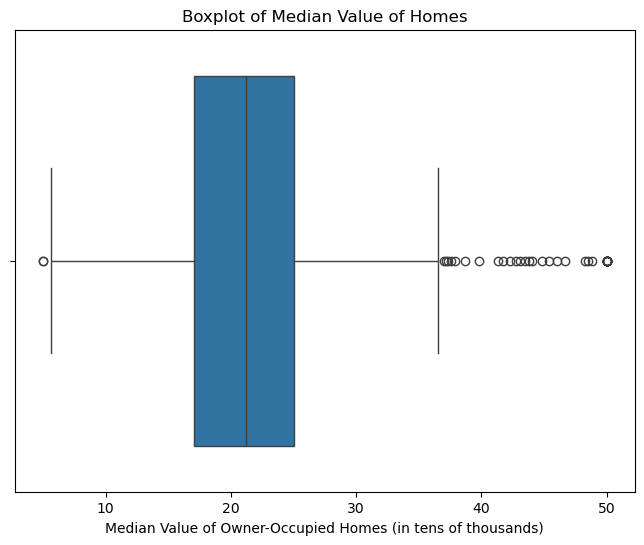

In [22]:
# Task 1: Boxplot of Median Value of Owner-Occupied Homes (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(x='MEDV', data=boston_df)
plt.xlabel("Median Value of Owner-Occupied Homes (in tens of thousands)")
plt.title("Boxplot of Median Value of Homes")
plt.show()


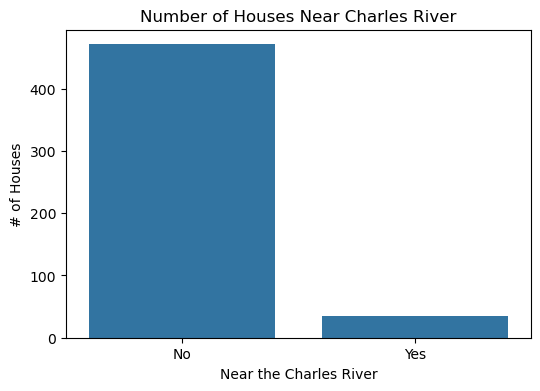

In [23]:
# Task 2: Bar Plot of Charles River Variable (CHAS)
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.xlabel("Near the Charles River")
plt.ylabel("# of Houses")
plt.title("Number of Houses Near Charles River")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


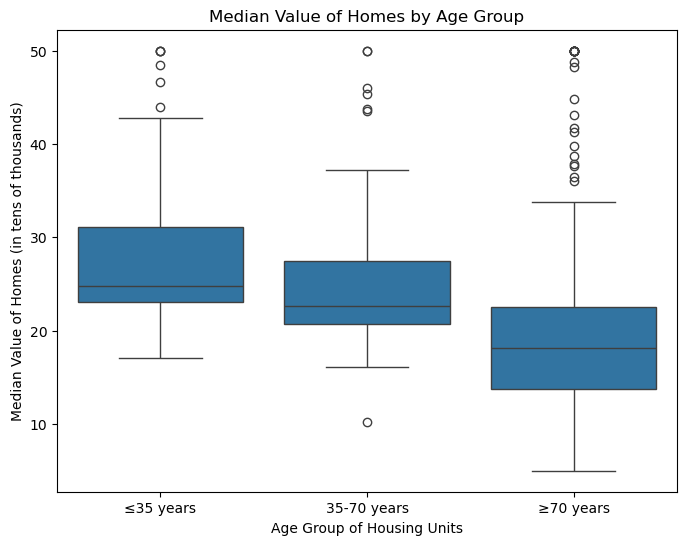

In [25]:
# Task 3: Boxplot of MEDV by Age Group (AGE)
boston_df['AgeGroup'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=["≤35 years", "35-70 years", "≥70 years"])
plt.figure(figsize=(8, 6))
sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df)
plt.xlabel("Age Group of Housing Units")
plt.ylabel("Median Value of Homes (in tens of thousands)")
plt.title("Median Value of Homes by Age Group")
plt.show()


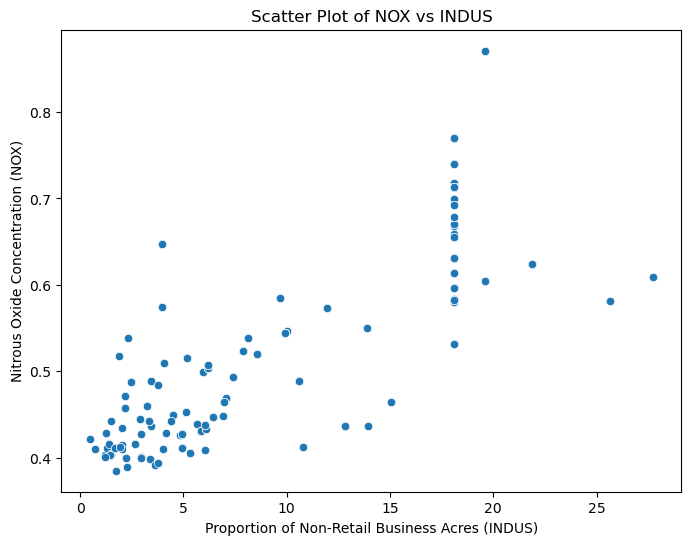

In [26]:
# Task 4: Scatter Plot of NOX vs. INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitrous Oxide Concentration (NOX)")
plt.title("Scatter Plot of NOX vs INDUS")
plt.show()


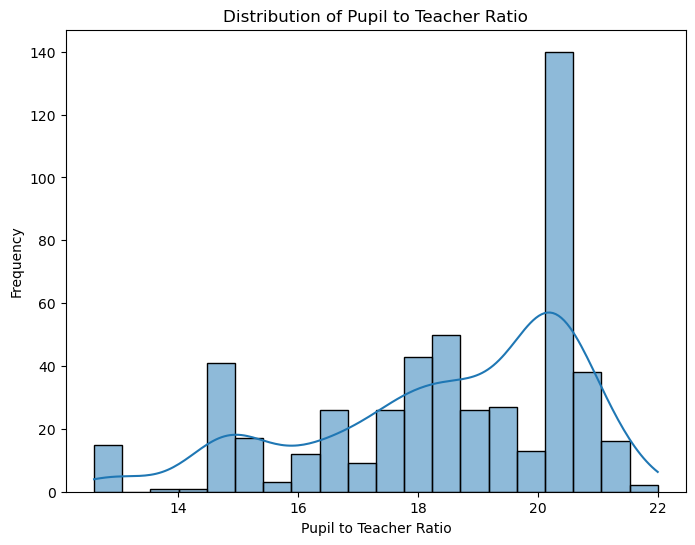

In [27]:
# Task 5: Histogram of Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Pupil to Teacher Ratio")
plt.show()


In [28]:
# Task 6: T-test for the impact of being located near the Charles River on median home values
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-test for Charles River impact on home values:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median home values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values.")


T-test for Charles River impact on home values:
T-statistic: 3.1133, P-value: 0.0036
Reject the null hypothesis: There is a significant difference in median home values.


In [29]:
# Task 7: ANOVA for Age Groups and Median Home Value
thirtyfive = boston_df[boston_df['AgeGroup'] == '≤35 years']['MEDV']
between = boston_df[boston_df['AgeGroup'] == '35-70 years']['MEDV']
seventy = boston_df[boston_df['AgeGroup'] == '≥70 years']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive, between, seventy)

print(f"ANOVA for Age Group and Home Value:\nF-statistic: {f_statistic:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median home values across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values across age groups.")


ANOVA for Age Group and Home Value:
F-statistic: 36.4076, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median home values across age groups.


In [30]:
# Task 8: Pearson Correlation between NOX and INDUS
corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation between NOX and INDUS:\nCorrelation Coefficient: {corr_coef:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Pearson Correlation between NOX and INDUS:
Correlation Coefficient: 0.7637, P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [31]:
# Task 9: Regression Analysis: Impact of Distance to Employment Centers (DIS) on MEDV
X = boston_df['DIS']
X = sm.add_constant(X)  # Add constant to the model
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()

print("\nRegression Analysis Summary:")
print(model.summary())

# Interpretation: p-value for DIS
p_value_dis = model.pvalues['DIS']
if p_value_dis < 0.05:
    print("Reject the null hypothesis: Distance to employment centers significantly impacts median home value.")
else:
    print("Fail to reject the null hypothesis: Distance to employment centers does not significantly impact median home value.")



Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        23:40:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901 